In [1]:
import pandas as pd

(link to dataset)[https://dataverse.harvard.edu/dataset.xhtml?id=3047332]

In [2]:
tweets_df = pd.read_csv('./top-20-tweets-2017.csv')

In [3]:
tweets_df.shape

(52542, 10)

In [4]:
tweets_df.dtypes

author               object
content              object
country              object
date_time            object
id                  float64
language             object
latitude            float64
longitude           float64
number_of_likes       int64
number_of_shares      int64
dtype: object

In [5]:
print(
    tweets_df.date_time.min()
    , tweets_df.date_time.max()
)

01/01/2011 02:16 31/12/2016 23:59


In [6]:
tweets_df.sample(10)

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
31153,britneyspears,Awww! #Smurfs2 was super cute! The boys love...,NaN,28/07/2013 21:28,3.615990e+17,en,NaN,NaN,2487,2816
22705,Twitter,Happy Persian New Year! Here's a gift made by ...,NaN,20/03/2014 21:26,4.467600e+17,en,NaN,NaN,999,851
549,katyperry,@katycatwendy ur avatar tho 😛,NaN,15/07/2016 05:53,7.538300e+17,hi,NaN,NaN,4330,1395
6743,taylorswift13,Christmas trees. :) http://t.co/gRmRHBet,NaN,27/11/2011 00:53,1.405940e+17,et,NaN,NaN,1363,2683
31769,Cristiano,So happy and glad to win. Thanks Real Madrid a...,NaN,12/12/2016 22:34,8.084400e+17,en,NaN,NaN,128474,70288
29879,britneyspears,@BabifanBritney Actually this is available int...,NaN,11/02/2015 00:29,5.653070e+17,en,NaN,NaN,528,270
45780,shakira,Sign here to tell your current leaders that we...,NaN,16/09/2015 22:22,6.442750e+17,en,NaN,NaN,1006,401
47077,shakira,"This week, Shakira met with @HardRock to donat...",NaN,13/06/2013 16:43,3.452200e+17,en,NaN,NaN,215,243
34708,selenagomez,NY fam time ☺️ http://t.co/EUJbQSL2Et,NaN,15/12/2014 04:27,5.443480e+17,en,NaN,NaN,13883,9059
14149,YouTube,When cardio day is killing you → https://t.co/...,NaN,01/08/2016 20:10,7.602060e+17,en,NaN,NaN,2385,642


In [7]:
tweets_df.author.unique()

array(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama',
       'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter',
       'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano',
       'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira',
       'instagram', 'ddlovato'], dtype=object)

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [9]:
sample_tweets = tweets_df.content.sample(1000).values
sample_scores = []
for tweet in sample_tweets:
    sample_scores.append(analyser.polarity_scores(tweet))
    
df = pd.DataFrame(data = {'tweet': sample_tweets, 'vader_score': sample_scores})
df['sample_compound_score'] = df.vader_score.apply(lambda x: x['compound'])
    

In [19]:
tweets_df['vader_score'] = tweets_df.content.apply(lambda x: analyser.polarity_scores(x))

In [29]:
tweets_df['compound_score'] = tweets_df.vader_score.apply(lambda x: x['compound'])
tweets_df['datetime'] = pd.to_datetime(tweets_df.date_time)
    

In [24]:
import seaborn as sns


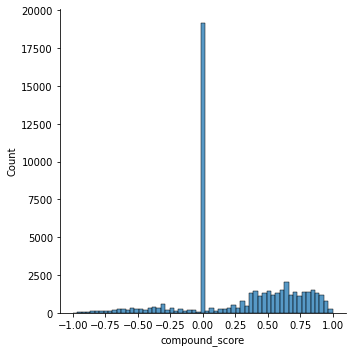

In [23]:
# distribution of compound_score
sns.displot(tweets_df.compound_score)

<AxesSubplot:xlabel='datetime', ylabel='compound_score'>

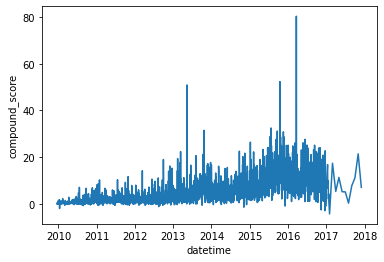

In [39]:
sentiment_by_day = tweets_df.groupby(tweets_df.datetime.dt.date).agg(
    {'compound_score': 'sum'}
)

sns.lineplot(data=sentiment_by_day, x="datetime", y="compound_score")

[tutorial notes](http://docs.tweepy.org/en/latest/getting_started.html)

In [14]:
import os
import yaml
import tweepy

In [15]:
# api creds
creds = yaml.load(
    open(os.path.expanduser('~/.twitter/creds.yml')), 
    Loader=yaml.FullLoader)

In [16]:
# api auth
auth = tweepy.OAuthHandler(
    consumer_key=creds['api-key'], 
    consumer_secret=creds['api-secret']
)

auth.set_access_token(
    key=creds['access-token'], 
    secret=creds['access-token-secret']
)

api = tweepy.API(auth)

In [17]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Dalvin Cook you fuckhead!
WITCHING HOUR LIVE STREAM!

https://t.co/GhyrBZFZeR
“China is innocent!”

Facing global anger over their initial mishandling of the outbreak, Chinese authorities are t… https://t.co/uc0VRsXCUB
Update on @Billyhottakes’ parlays. I just paid him 2 units ($40) to shut up and stop rooting against me. 

Therefor… https://t.co/kwtQxsQFf8
Historic locust infestations, a monthlong civil war and coronavirus lockdowns have left Ethiopia's once-golden econ… https://t.co/FA2AZLUwim
⚠️ Offensive Genius at work ⚠️ https://t.co/YJCHmLybvI
This camera angle in DET CHI dosent even look like football. Im too dumb to process whats going on and it makes me… https://t.co/1WVT2fr8PE
These FIFA 21 Next Gen graphics look incredible 🤯 https://t.co/4wP13VtE3C
Sindrome del sopravvissuto, rabbia, ripensamenti e incubi. Queste sono solo alcune delle cose che tormentano gli ab… https://t.co/st8RL1iNpq
🌳🌳🌳 💨 💨 💨 https://t.co/EGJ13mii5U
RT @pamshaffermusic: Ever spent an afternoon on the bac

In [18]:
user = api.get_user('ravedappeport')
user

User(_api=<tweepy.api.API object at 0x12df89ef0>, _json={'id': 491393897, 'id_str': '491393897', 'name': 'Dave Rappeport', 'screen_name': 'RaveDappeport', 'location': '', 'profile_location': None, 'description': 'percolating and proliferating nonsense', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 5, 'friends_count': 54, 'listed_count': 0, 'created_at': 'Mon Feb 13 15:53:21 +0000 2012', 'favourites_count': 4, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 8, 'lang': None, 'status': {'created_at': 'Sun Feb 17 02:39:30 +0000 2013', 'id': 302970499300982784, 'id_str': '302970499300982784', 'text': 'Great speeches are a quality of great men #devries', 'truncated': False, 'entities': {'hashtags': [{'text': 'devries', 'indices': [42, 50]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://www.apple.com" rel="nofollow">iOS</a>', 'in_reply_to_status_id': None, 'in_rep